In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



Epoch 1
Prediction: 0.4502  Error: 0.2026
Prediction: 0.4397  Error: 0.3139
Prediction: 0.3330  Error: 0.1109
Prediction: 0.5685  Error: 0.1862
Prediction: 0.4602  Error: 0.2914
Prediction: 0.4594  Error: 0.2111

Epoch 2
Prediction: 0.4481  Error: 0.2008
Prediction: 0.4624  Error: 0.2891
Prediction: 0.3363  Error: 0.1131
Prediction: 0.5845  Error: 0.1726
Prediction: 0.4820  Error: 0.2683
Prediction: 0.4565  Error: 0.2083

Epoch 3
Prediction: 0.4452  Error: 0.1982
Prediction: 0.4838  Error: 0.2665
Prediction: 0.3390  Error: 0.1149
Prediction: 0.5989  Error: 0.1609
Prediction: 0.5025  Error: 0.2475
Prediction: 0.4527  Error: 0.2049

Epoch 4
Prediction: 0.4416  Error: 0.1950
Prediction: 0.5039  Error: 0.2461
Prediction: 0.3412  Error: 0.1164
Prediction: 0.6116  Error: 0.1508
Prediction: 0.5216  Error: 0.2288
Prediction: 0.4482  Error: 0.2009

Epoch 5
Prediction: 0.4372  Error: 0.1912
Prediction: 0.5227  Error: 0.2279
Prediction: 0.3428  Error: 0.1175
Prediction: 0.6230  Error: 0.1422
Pre

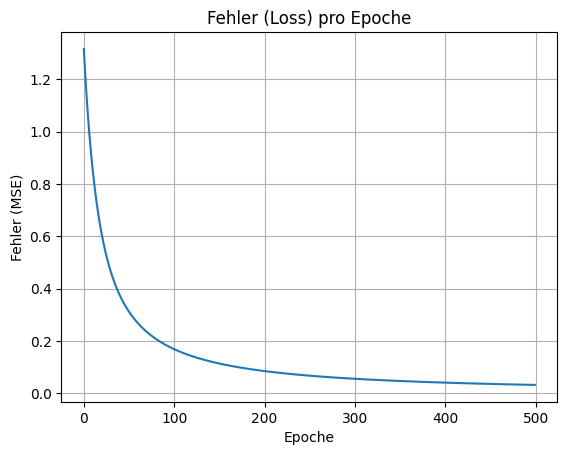

In [47]:
# Daten definieren
 
X = np.array( [ [ 1, 0, 1 ],
                [ 0, 1, 1 ],
                [ 0, 0, 1 ],
                [ 1, 1, 1 ],
                [ 0, 1, 1 ],
                [ 1, 0, 1 ] ] )

y = np.array( [ 0, 1, 0, 1, 1, 0 ] ).T

weights = np.array([0.5,0.48,-0.7])
l_rate = 0.1



# Aktivierungsfunktiuon
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1/(1 + np.exp(-x)) 

def sigmoid_deriv(output):
    return output * (1 - output )


# Fehler über Epochen speichern
loss_per_epoch = []

# Das Learning
for epoch in range(500):
    total_error = 0  # wichtig!
    print(f"\nEpoch {epoch+1}")
    for i in range(len(y)):
        input = X[i]
        target = y[i]

        weighted_sum = np.dot(input, weights)
        prediction = sigmoid(weighted_sum)

        # Error
        error = (prediction - target) ** 2
        total_error += error  # Akkumulieren

        # Backpropagation
        derror_dpred = 2 * (prediction - target)
        dpred_dz = sigmoid_deriv(prediction)
        dz_dw = input

        gradient = derror_dpred * dpred_dz * dz_dw
        weights -= l_rate * gradient

        print(f"Prediction: {prediction:.4f}  Error: {error:.4f}")

    # Fehler am Ende der Epoche speichern
    loss_per_epoch.append(total_error)



print(f"\nFinal Weights: {weights}")



plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
plt.title("Fehler (Loss) pro Epoche")
plt.xlabel("Epoche")
plt.ylabel("Fehler (MSE)")
plt.grid(True)
plt.show()
